### 1. Import Libraries

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 2. Load the Dataset

In [15]:
df = pd.read_csv("G:\\programming\\AI Course\\رواد مصر\\pyhon project\\Python Project Data - Supermarket Sales.csv")

### 3. Data Exploration

Check the first few rows:

In [16]:
df.head(10)

,Invoice ID,Branch,Yangon,Naypyitaw,Mandalay,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,Rating
0,750-67-8428,A,1,0,0,Normal,Male,Health and beauty,74.69,7,26.1415,NaN,1/5/2019,13:08,Ewallet,9.1
1,226-31-3081,C,0,1,0,Normal,Male,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,9.6
2,631-41-3108,A,1,0,0,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,7.4
3,123-19-1176,A,1,0,0,Normal,Male,Health and beauty,58.22,8,NaN,489.0480,1/27/2019,8 - 30 PM,Ewallet,8.4
4,373-73-7910,A,1,0,0,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,5.3
5,699-14-3026,C,0,1,0,Normal,Male,Electronic accessories,85.39,7,29.8865,627.6165,3/25/2019,18:30,Ewallet,4.1
6,355-53-5943,A,1,0,0,Normal,Male,Electronic accessories,68.84,6,20.6520,433.6920,2/25/2019,14:36,Ewallet,5.8
7,315-22-5665,C,0,1,0,Normal,Male,Home and lifestyle,73.56,10,36.7800,772.3800,2/24/2019,11:38,Ewallet,8.0
8,665-32-9167,A,1,0,0,Normal,Male,Health and beauty,36.26,2,NaN,76.1460,1/10/2019,17:15,Credit card,7.2
9,692-92-5582,B,0,0,1,Normal,Male,Food and beverages,54.84,3,8.2260,172.7460,2/20/2019,13:27,Credit card,5.9


Check data types and missing values:

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1006 entries, 0 to 1005
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Invoice ID     1006 non-null   object 
 1   Branch         1006 non-null   object 
 2   Yangon         1006 non-null   int64  
 3   Naypyitaw      1006 non-null   int64  
 4   Mandalay       1006 non-null   int64  
 5   Customer type  1006 non-null   object 
 6   Gender         1006 non-null   object 
 7   Product line   1006 non-null   object 
 8   Unit price     1006 non-null   object 
 9   Quantity       1006 non-null   int64  
 10  Tax 5%         997 non-null    float64
 11  Total          1003 non-null   float64
 12  Date           1006 non-null   object 
 13  Time           1006 non-null   object 
 14  Payment        1006 non-null   object 
 15  Rating         1006 non-null   float64
dtypes: float64(3), int64(4), object(9)
memory usage: 125.9+ KB


Summary statistics:

In [18]:
df.describe()

,Yangon,Naypyitaw,Mandalay,Quantity,Tax 5%,Total,Rating
count,1006.000000,1006.000000,1006.000000,1006.000000,997.000000,1003.000000,1006.000000
mean,0.338966,0.329026,0.332008,5.469185,15.479682,322.734689,7.056163
std,0.473594,0.470093,0.471168,3.014153,11.728320,245.865964,3.318751
min,0.000000,0.000000,0.000000,-8.000000,0.508500,10.678500,4.000000
25%,0.000000,0.000000,0.000000,3.000000,5.986500,123.789750,5.500000
50%,0.000000,0.000000,0.000000,5.000000,12.227500,254.016000,7.000000
75%,1.000000,1.000000,1.000000,8.000000,22.720500,471.009000,8.500000
max,1.000000,1.000000,1.000000,10.000000,49.650000,1042.650000,97.000000


Check for missing values:

In [19]:
df.isnull().sum()

Invoice ID       0
Branch           0
Yangon           0
Naypyitaw        0
Mandalay         0
Customer type    0
Gender           0
Product line     0
Unit price       0
Quantity         0
Tax 5%           9
Total            3
Date             0
Time             0
Payment          0
Rating           0
dtype: int64

Check for duplicates:

In [20]:
df.duplicated().sum()

6

### 4. Data Cleaning

Handle missing values:

In [21]:
df.dropna(inplace=True)

Remove duplicates:

In [22]:
df.drop_duplicates(inplace=True)

Convert Date and Time to datetime format:

In [23]:
df['Date'] = pd.to_datetime(df['Date'])

df['Hour'] = pd.to_datetime(df['Time'], format='%H:%M').dt.hour
#df['Hour'] = df['Time'].apply(lambda x: x.hour if pd.notnull(x) else None)


Ensure numeric columns are correctly typed:

In [24]:
df['Unit price'] = df['Unit price'].astype(float)
df['Quantity'] = df['Quantity'].astype(int)
df['Tax 5%'] = df['Tax 5%'].astype(float)
df['Total'] = df['Total'].astype(float)

Cleaning customer to make only two uniqe values

In [25]:
print(df['Customer type'].unique())

['Normal' '-' 'Member' 'Memberr']


In [26]:
df['Customer type'] = df['Customer type'].replace({'Memberr': 'Member', '-': 'Normal'})

In [27]:
print(df['Customer type'].unique())

['Normal' 'Member']


### 5. Data Transformation

One-hot encoding for categorical variables:

In [28]:
df_encoded = pd.get_dummies(df, columns=['Customer type', 'Gender', 'Product line', 'Payment'], drop_first=True)

### 6. Data Visualization

Visualize distributions and relationships:

1. Distribution of total sales

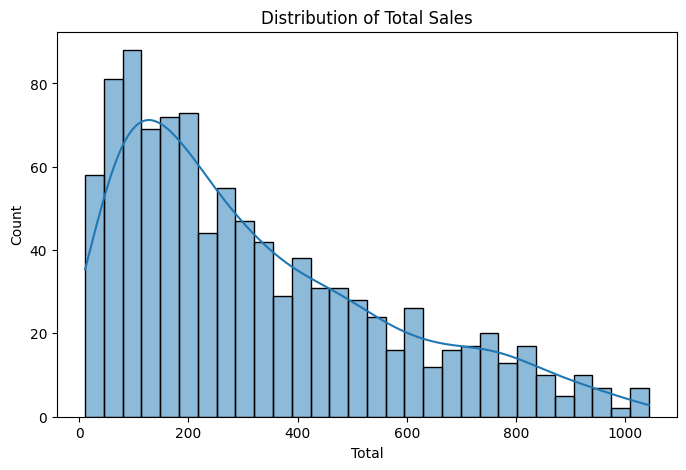

In [29]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Total'], bins=30, kde=True)
plt.title("Distribution of Total Sales")
plt.show()

2. Quantity purchased across product lines

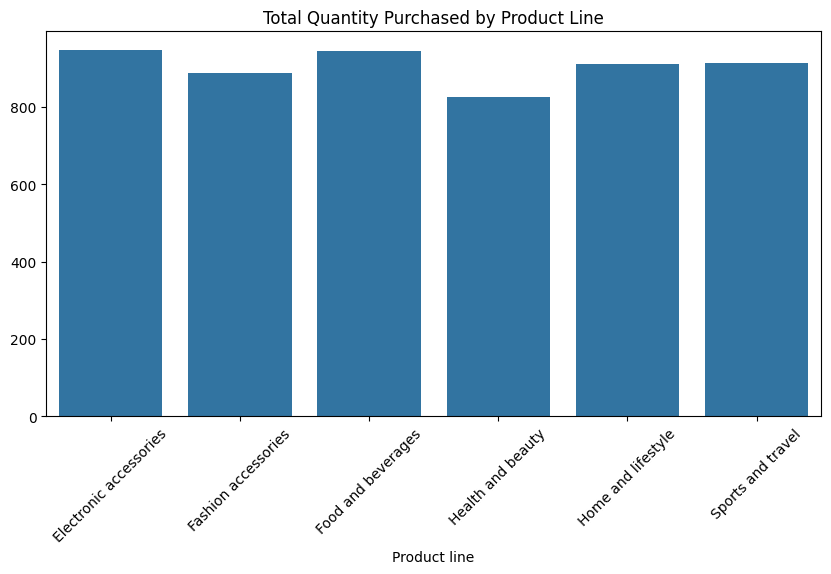

In [30]:
plt.figure(figsize=(10, 5))
sns.barplot(x=df.groupby('Product line')['Quantity'].sum().index, y=df.groupby('Product line')['Quantity'].sum().values)
plt.xticks(rotation=45)
plt.title("Total Quantity Purchased by Product Line")
plt.show()

3. Peak shopping hours

C:\Users\power tech\AppData\Local\Temp\ipykernel_6336\3710636370.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Hour', data=df, palette='viridis')


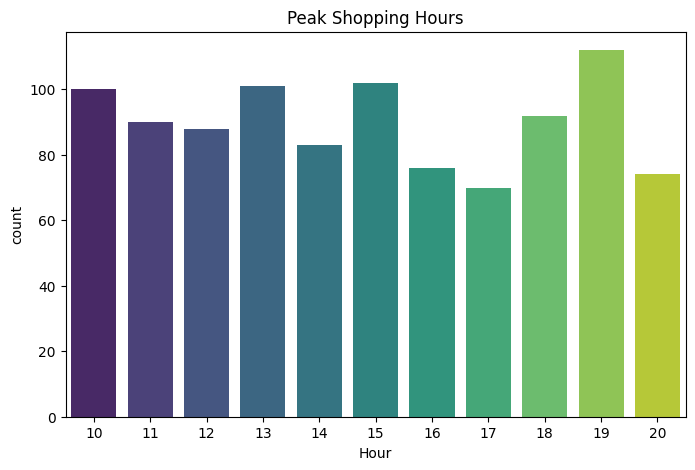

In [31]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Hour', data=df, palette='viridis')
plt.title("Peak Shopping Hours")
plt.show()

4. Total sales by customer type

C:\Users\power tech\AppData\Local\Temp\ipykernel_6336\1374820495.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Customer type', y='Total', data=df, estimator=sum, palette='coolwarm')


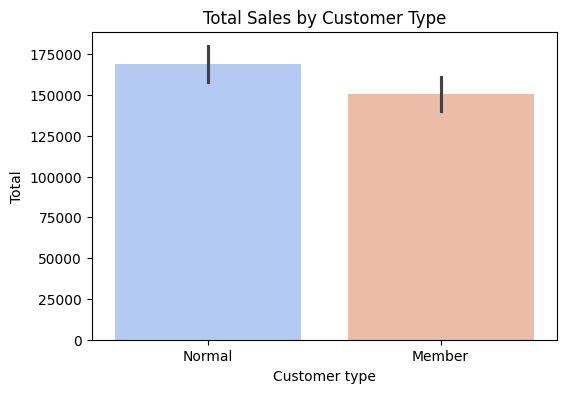

In [32]:
plt.figure(figsize=(6, 4))
sns.barplot(x='Customer type', y='Total', data=df, estimator=sum, palette='coolwarm')
plt.title("Total Sales by Customer Type")
plt.show()

5. Highest sales product line

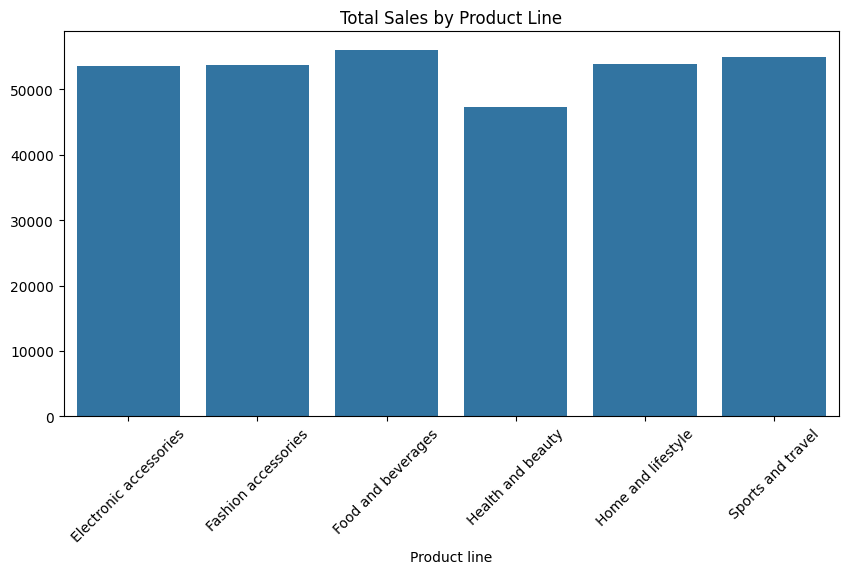

In [33]:
plt.figure(figsize=(10, 5))
sns.barplot(x=df.groupby('Product line')['Total'].sum().index, y=df.groupby('Product line')['Total'].sum().values)
plt.xticks(rotation=45)
plt.title("Total Sales by Product Line")
plt.show()

6. Effect of payment method on total sales

C:\Users\power tech\AppData\Local\Temp\ipykernel_6336\1240073127.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Payment', y='Total', data=df, estimator=sum, palette='coolwarm')


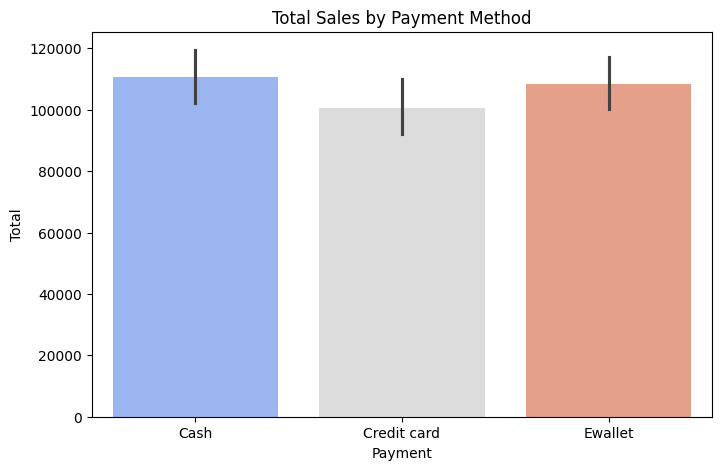

In [34]:
plt.figure(figsize=(8, 5))
sns.barplot(x='Payment', y='Total', data=df, estimator=sum, palette='coolwarm')
plt.title("Total Sales by Payment Method")
plt.show()

7. Correlation between unit price and total sales

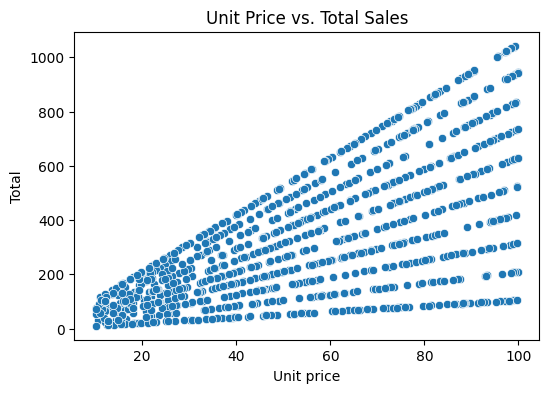

In [35]:
plt.figure(figsize=(6, 4))
sns.scatterplot(x=df['Unit price'], y=df['Total'])
plt.title("Unit Price vs. Total Sales")
plt.show()

8. Effect of gender on spending

C:\Users\power tech\AppData\Local\Temp\ipykernel_6336\2557760608.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Gender', y='Total', data=df, estimator=sum, palette='coolwarm')


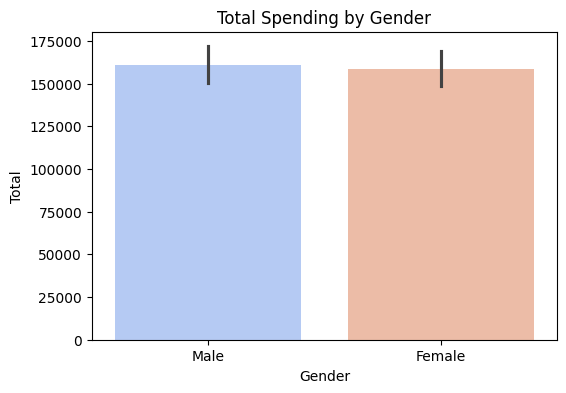

In [36]:
plt.figure(figsize=(6, 4))
sns.barplot(x='Gender', y='Total', data=df, estimator=sum, palette='coolwarm')
plt.title("Total Spending by Gender")
plt.show()

9. Relationship between tax and total sales

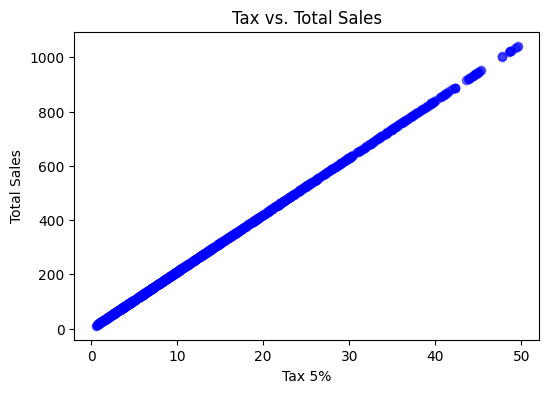

In [37]:
plt.figure(figsize=(6, 4))
plt.scatter(df['Tax 5%'], df['Total'], alpha=0.5, color='blue')
plt.xlabel("Tax 5%")
plt.ylabel("Total Sales")
plt.title("Tax vs. Total Sales")
plt.show()

### Summary of Key Insights

In [38]:
print("\nSummary of Key Insights:")
print(f"- Peak shopping hours: {df['Hour'].value_counts().idxmax()} has the highest customer visits.")
print(f"- Most popular product line: {df.groupby('Product line')['Total'].sum().idxmax()} generates the highest total sales.")
print(f"- Preferred payment method: {df.groupby('Payment')['Total'].sum().idxmax()} contributes the most to total sales.")
print(f"- Customer type impact: {df.groupby('Customer type')['Total'].sum().idxmax()} customers spend more.")
print(f"- Gender impact: {'Male' if df.groupby('Gender')['Total'].sum().idxmax() == 'Male' else 'Female'} spends more overall.")


Summary of Key Insights:
- Peak shopping hours: 19 has the highest customer visits.
- Most popular product line: Food and beverages generates the highest total sales.
- Preferred payment method: Cash contributes the most to total sales.
- Customer type impact: Normal customers spend more.
- Gender impact: Male spends more overall.


### Save transformed data

In [39]:
df.to_csv("G:\\programming\\AI Course\\رواد مصر\\pyhon project\\cleaned_supermarket_sales.csv", index=False)

In [40]:
print("Transformed data and visualizations completed successfully.")

Transformed data and visualizations completed successfully.
